In [50]:
# %load "C:\Users\Ziyad\Desktop\Kernel_methods\kernel.py"
from math import exp, sqrt
import numpy.linalg as npl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def Gk_image(x,t,sigma=1):
    """
    For real vectors x and t returns their image by the
    gaussian kernel
    
    Parameters
    ----------
    x : array like - 1D array
    t : array like - 1D array
    
    Returns
    -------
    y : float

    """
    y=exp(-npl.norm(x-t)**2/sigma**2)
    
    return y
#--------------------------------------------------------

def Gk_distance(x,y,sigma=1):
    """
    for real vectors x and y computes the distance
    between their images in the gaussian kernel Hilbert 
    space 

    Parameters
    ----------
    x : array like - 1D array
    y : array like - 1D array

    Returns
    -------
    d : float

    """
    d=sqrt(2*(1-Gk_image(x,y,sigma)))
    return d

#--------------------------------------------------------

def Gk_gram_matrix(x,sigma=1):
    """
    for a dataset x return the matrix A that has for 
    entries A(i,j) = the image of the i line and the j
    line by the gaussian kernel
    
    Parameters
    ----------
    x : array like - 2D array

    Returns
    -------
    y : array like - 2D array

    """
    (n,p)=x.shape
    
    y=np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            l=x[i,:]
            m=x[j,:]
            y[i][j]=Gk_image(l,m,sigma)
    y=y + y.T - np.diag(y.diagonal())
    return y

#--------------------------------------------------------

class Gk_PCA:
    
    
    def __init__(self,dataset,sigma=1):
        self.sigma=sigma
        self.dataset=dataset
        self.K=np.zeros(dataset.shape)
        self.directions=[]
        self.explained_variance=[]
        
    def compute_gram_matrix(self):
        self.K=Gk_gram_matrix(self.dataset,self.sigma)
        
    def compute_directions(self):
        
        ## Centered Gram matrix
        n=self.K.shape[0]
        m=np.ones((n,n))/n
        i=np.eye(n)
        self.K_c=(i-m) @ self.K @ (i-m)
        
        ## Eigenvalues
        w,v=npl.eigh(self.K_c)
        order=np.argsort(-w)
        w=w[order]
        v=v[:,order]
        i=0
        while w[i]>=0:
            i=i+1
        w=w[0:i]
        v=v[:,0:i]
        
        #Directions
        D=np.zeros((n,i))
        for j in range (i):
            D[:,j]=v[:,j]/sqrt(w[j])
        
        self.directions=D
        
        #Explained_variance
        for j in range (i):
            self.explained_variance.append(1/n*D[:,j].T
                @ self.K_c @ self.K_c @ D[:,j])
        
        
        
    def reduce(self):
        return self.K_c @ self.directions
    
    def scree_plot(self):
        x = np.arange(len(self.explained_variance))+1
        plt.plot(x, self.explained_variance, 'o-', linewidth=2, color='blue')
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained')
        plt.show()
        
    def plot(self):
        x=self.reduce()
        plt.scatter(x[:,0],x[:,1])
        plt.xlabel('First component')
        plt.ylabel('Second component')
        plt.show()
                
            
#--------------------------------------------------------

class Gk_SpectralClustering :
    
    def __init__(self,nb_clusters,dataset,sigma=1):
        self.k=nb_clusters
        self.dataset=dataset
        self.sigma=sigma
        
    def compute_gram_matrix(self):
        self.K=Gk_gram_matrix(self.dataset,self.sigma)
        
    def compute_clusters(self):
        ## Centered Gram matrix
        n=self.K.shape[0]
        m=np.ones((n,n))/n
        i=np.eye(n)
        self.K_c=(i-m) @ self.K @ (i-m)
        
        ## Eigenvalues
        w,v=npl.eigh(self.K_c)
        order=np.argsort(-w)
        w=w[order]
        v=v[:,order]
        self.Z=v[:,0:self.k]
        
        ## Normalize Z
        A=self.Z
        norm=npl.norm(A,axis=1)
        for i in range(n):
            A[i,:]=A[i,:]/norm[i]
        
        ## Regular KMeans to A
        km=KMeans(n_clusters=self.k)
        return(km.fit_predict(A))

# Importation des données 

In [51]:
import pandas as pd

In [52]:
df=pd.read_csv(r"C:\Users\Ziyad\Desktop\Kernel_methods\Dataset\Count_Matrix.txt",index_col=0)

In [53]:
df.head()

,Itm2a,Sergef,Chil5,Fam109a,Dhx9,Ssu72,Olfr1018,Fam71e2,Eif2b2,1700061E18Rik,...,Itgb1bp2,Olfr372,Ctsw,Gosr1,Ryk,Rhd,Pxmp4,4930455C13Rik,Reg4,Prss39
A1-P1-DG_S100_L001_R1_001,0.0,0.000,0.0,0.000,0.000,5.043,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.000,0.0,3.214,0.000,0.0,0.0
A1-P1-DG_S101_L001_R1_001,0.0,7.092,0.0,0.000,3.096,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,6.96,0.000,0.0,0.000,0.000,0.0,0.0
A1-P1-DG_S102_L001_R1_001,0.0,0.000,0.0,4.205,4.599,6.439,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.000,0.0,0.000,0.000,0.0,0.0
A1-P1-DG_S103_L001_R1_001,0.0,7.511,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.000,0.0,0.000,0.000,0.0,0.0
A1-P1-DG_S104_L001_R1_001,0.0,6.803,0.0,0.000,4.118,0.000,0.0,0.0,0.0,0.0,...,7.021,0.0,0.0,0.00,6.392,0.0,3.945,5.005,0.0,0.0


In [54]:
x=df.to_numpy()

In [55]:
x

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 7.092, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 6.388, 4.15 , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [13]:
x.shape

(1402, 25392)

# Kernel PCA

In [109]:
my_pca=Gk_PCA(dataset=x,sigma=100)

In [110]:
import time
t1=time.time()
my_pca.compute_gram_matrix()
t2=time.time()

In [111]:
t2-t1

275.7493050098419

In [112]:
my_pca.compute_directions()

In [113]:
my_pca.reduce()

array([[-1.02535006e-03,  1.02850794e-03, -1.16533405e-03, ...,
         5.32882472e-05,  4.21980370e-05, -3.27233113e-06],
       [-1.00871462e-03,  9.80455345e-04, -8.97637349e-04, ...,
         1.25578503e-05, -1.63573202e-05,  4.78874721e-06],
       [-1.01918151e-03,  9.89861684e-04, -9.50547491e-04, ...,
         4.56249596e-07,  4.90936783e-06, -2.35249245e-06],
       ...,
       [-1.01818351e-03,  9.99248649e-04, -1.05535271e-03, ...,
         8.39834136e-06,  1.51809584e-05,  1.74781659e-06],
       [-1.02088930e-03,  9.96189474e-04, -1.03137703e-03, ...,
         7.57050231e-06,  1.38547161e-05, -5.07407491e-07],
       [-1.02737856e-03,  1.03945109e-03, -1.17593612e-03, ...,
         1.27586542e-05,  3.55875412e-05, -1.78495583e-06]])

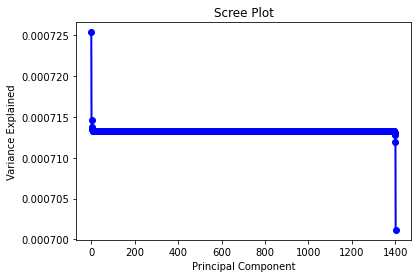

In [114]:
my_pca.scree_plot()

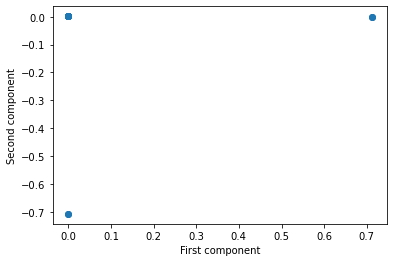

In [115]:
my_pca.plot()

In [56]:
clusters=pd.read_csv(r"C:\Users\Ziyad\Desktop\Kernel_methods\Dataset\CLUSTER_AND_SUBCLUSTER_INDEX.txt",delim_whitespace=True)

In [57]:
clusters=clusters.drop(labels=0)

In [58]:
clusters.head()

,NAME,CLUSTER,SUB-CLUSTER
1,A1-P1-DG_S100_L001_R1_001,DG,DG_Penk
2,A1-P1-DG_S101_L001_R1_001,DG,DG_Cck
3,A1-P1-DG_S102_L001_R1_001,GABAergic,Gad2_Sst
4,A1-P1-DG_S103_L001_R1_001,DG,DG_Cck
5,A1-P1-DG_S104_L001_R1_001,DG,DG_Penk


In [59]:
set(clusters['CLUSTER'])

{'CA1', 'CA2', 'CA3', 'DG', 'Ependymal', 'GABAergic', 'Glia', 'Non'}

# Spectral clustering

In [60]:
sc=Gk_SpectralClustering(dataset=x,nb_clusters=6,sigma=100)

In [61]:
sc.compute_gram_matrix()

In [69]:
c=sc.compute_clusters()

In [70]:
labels=clusters['CLUSTER']

In [72]:
labels=np.array(labels)

In [73]:
labels

array(['DG', 'DG', 'GABAergic', ..., 'CA2', 'CA2', 'CA2'], dtype=object)

In [75]:
from sklearn.metrics import homogeneity_score, completeness_score

print(homogeneity_score(labels,c))

0.20054986518781076


In [77]:
print(completeness_score(labels,c))

0.244387031079492
